# Introduction

## Problem
  How people can avoid or decrease the severity of car accidents?

## Background

>"Road traffic injuries are a major but neglected public health challenge that requires concerted efforts for effective and sustainable prevention. Of all the systems with which people have to deal every day, road traffic systems are the most complex and the most dangerous. Worldwide, an estimated 1.2 million people are killed in road crashes each year and as many as 50 million are injured. Projections indicate that these figures will increase by about 65% over the next 20 years unless there is new commitment to prevention."  
--World Health Organization

## Interest

Insurance companies would like to know what features influence the severity of car accidents and adjust their insurance premium. 

## Data

In [1]:
import pandas as pd
url="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df=pd.read_csv(url)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print(df.shape)
df['SEVERITYCODE'].value_counts()

(194673, 38)


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Our dataset consists of 194673 car accidents. There are 37 input features and 1 target variable. The first column is the target variable, namely severitycode. Each accident is lebeled as 1(prop damage) or 2(injury). 

Source: [Seattle GeoData](http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0/data)

# Data Pre-Processing

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

## Feature Selection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

Features that are not important to the analysis or have too many missing values were discarded. 

In [6]:
df=df[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','INCDTTM','WEATHER','ROADCOND']]
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDTTM,WEATHER,ROADCOND
0,2,Intersection,Angles,3/27/2013 2:54:00 PM,Overcast,Wet
1,1,Block,Sideswipe,12/20/2006 6:55:00 PM,Raining,Wet
2,1,Block,Parked Car,11/18/2004 10:20:00 AM,Overcast,Dry
3,1,Block,Other,3/29/2013 9:26:00 AM,Clear,Dry
4,2,Intersection,Angles,1/28/2004 8:04:00 AM,Raining,Wet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         192747 non-null object
COLLISIONTYPE    189769 non-null object
INCDTTM          194673 non-null object
WEATHER          189592 non-null object
ROADCOND         189661 non-null object
dtypes: int64(1), object(5)
memory usage: 8.9+ MB


In [8]:
df=df.dropna(subset=['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','INCDTTM','WEATHER','ROADCOND'],axis=0) #drop entire rows that contain missing values
df.shape

(187706, 6)

In [9]:
df['SEVERITYCODE'].value_counts()

1    130796
2     56910
Name: SEVERITYCODE, dtype: int64

In [10]:
df['INCDTTM']=pd.to_datetime(df['INCDTTM'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187706 entries, 0 to 194672
Data columns (total 6 columns):
SEVERITYCODE     187706 non-null int64
ADDRTYPE         187706 non-null object
COLLISIONTYPE    187706 non-null object
INCDTTM          187706 non-null datetime64[ns]
WEATHER          187706 non-null object
ROADCOND         187706 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 10.0+ MB


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [13]:
df['hour'] = df['INCDTTM'].dt.hour

In [14]:
import seaborn as sns

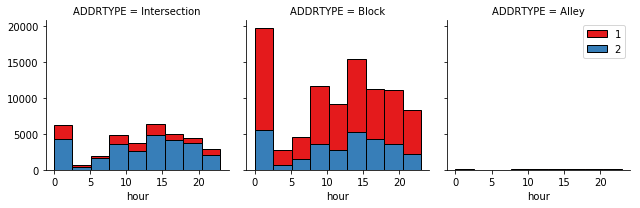

In [15]:
bins = np.linspace(df.hour.min(), df.hour.max(), 10)
g = sns.FacetGrid(df, col="ADDRTYPE", hue="SEVERITYCODE", palette="Set1", col_wrap=3)
g.map(plt.hist, 'hour', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [16]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDTTM,WEATHER,ROADCOND,hour
0,2,Intersection,Angles,2013-03-27 14:54:00,Overcast,Wet,14
1,1,Block,Sideswipe,2006-12-20 18:55:00,Raining,Wet,18
2,1,Block,Parked Car,2004-11-18 10:20:00,Overcast,Dry,10
3,1,Block,Other,2013-03-29 09:26:00,Clear,Dry,9
4,2,Intersection,Angles,2004-01-28 08:04:00,Raining,Wet,8


We see that accidents that happened at midnight are less severe, so lets use Feature binarization to set a threshold values less then hour 3

In [17]:
df['MIDNIGHT'] = df['hour'].apply(lambda x: 1 if (x<3)  else 0)
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,INCDTTM,WEATHER,ROADCOND,hour,MIDNIGHT
0,2,Intersection,Angles,2013-03-27 14:54:00,Overcast,Wet,14,0
1,1,Block,Sideswipe,2006-12-20 18:55:00,Raining,Wet,18,0
2,1,Block,Parked Car,2004-11-18 10:20:00,Overcast,Dry,10,0
3,1,Block,Other,2013-03-29 09:26:00,Clear,Dry,9,0
4,2,Intersection,Angles,2004-01-28 08:04:00,Raining,Wet,8,0


In [18]:
df.drop(["INCDTTM", "hour"],axis=1,inplace=True)

In [19]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,MIDNIGHT
0,2,Intersection,Angles,Overcast,Wet,0
1,1,Block,Sideswipe,Raining,Wet,0
2,1,Block,Parked Car,Overcast,Dry,0
3,1,Block,Other,Clear,Dry,0
4,2,Intersection,Angles,Raining,Wet,0


In [20]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46761
Angles        34586
Rear Ended    33820
Other         23465
Sideswipe     18460
Left Turn     13666
Pedestrian     6593
Cycles         5402
Right Turn     2938
Head On        2015
Name: COLLISIONTYPE, dtype: int64

In [21]:
df['WEATHER'].value_counts()

Clear                       110601
Raining                      32993
Overcast                     27566
Unknown                      14094
Snowing                        902
Other                          796
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [22]:
df['ROADCOND'].value_counts()

Dry               123861
Wet                47246
Unknown            14039
Ice                 1192
Snow/Slush           995
Other                125
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

## Convert Categorical Features to Numerical Values

In [23]:
Feature = df[['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','MIDNIGHT']]
Feature = pd.concat([Feature,pd.get_dummies(df['ADDRTYPE'])], axis=1)
Feature.drop(['Alley'], axis = 1,inplace=True)
Feature.head()


,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,MIDNIGHT,Block,Intersection
0,Intersection,Angles,Overcast,Wet,0,0,1
1,Block,Sideswipe,Raining,Wet,0,1,0
2,Block,Parked Car,Overcast,Dry,0,1,0
3,Block,Other,Clear,Dry,0,1,0
4,Intersection,Angles,Raining,Wet,0,0,1


In [24]:
Feature = pd.concat([Feature,pd.get_dummies(df['WEATHER'])], axis=1)
Feature.drop(['Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], axis = 1,inplace=True)
Feature.head()

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,MIDNIGHT,Block,Intersection,Clear,Overcast,Raining
0,Intersection,Angles,Overcast,Wet,0,0,1,0,1,0
1,Block,Sideswipe,Raining,Wet,0,1,0,0,0,1
2,Block,Parked Car,Overcast,Dry,0,1,0,0,1,0
3,Block,Other,Clear,Dry,0,1,0,1,0,0
4,Intersection,Angles,Raining,Wet,0,0,1,0,0,1


In [25]:
Feature = pd.concat([Feature,pd.get_dummies(df['ROADCOND'])], axis=1)
Feature.drop(['Unknown','Ice','Snow/Slush','Standing Water','Other','Oil','Sand/Mud/Dirt'], axis = 1,inplace=True)
Feature.head()

,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,MIDNIGHT,Block,Intersection,Clear,Overcast,Raining,Dry,Wet
0,Intersection,Angles,Overcast,Wet,0,0,1,0,1,0,0,1
1,Block,Sideswipe,Raining,Wet,0,1,0,0,0,1,0,1
2,Block,Parked Car,Overcast,Dry,0,1,0,0,1,0,1,0
3,Block,Other,Clear,Dry,0,1,0,1,0,0,1,0
4,Intersection,Angles,Raining,Wet,0,0,1,0,0,1,0,1


In [26]:
Feature = pd.concat([Feature,pd.get_dummies(df['COLLISIONTYPE'])], axis=1)
Feature.drop(['ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND'], axis = 1,inplace=True)
Feature.head()
print(Feature.shape)

(187706, 18)


In [27]:
'''
from sklearn import preprocessing
le_0= preprocessing.LabelEncoder()
le_0.fit(['Block','Intersection','Alley'])
Feature[:,0] = le_0.transform(Feature[:,0]) 


le_1= preprocessing.LabelEncoder()
le_1.fit(['Rear Ended','Angles','Parked Car','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])
Feature[:,1] = le_1.transform(Feature[:,1])


le_2 = preprocessing.LabelEncoder()
le_2.fit([ 'Clear', 'Raining', 'Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
Feature[:,2] = le_2.transform(Feature[:,2])

le_3 = preprocessing.LabelEncoder()
le_3.fit([ 'Dry', 'Wet', 'Unknown','Ice','Snow/Slush','Standing Water','Other','Oil','Sand/Mud/Dirt'])
Feature[:,3] = le_3.transform(Feature[:,3])

Feature[0:5]
'''

"\nfrom sklearn import preprocessing\nle_0= preprocessing.LabelEncoder()\nle_0.fit(['Block','Intersection','Alley'])\nFeature[:,0] = le_0.transform(Feature[:,0]) \n\n\nle_1= preprocessing.LabelEncoder()\nle_1.fit(['Rear Ended','Angles','Parked Car','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'])\nFeature[:,1] = le_1.transform(Feature[:,1])\n\n\nle_2 = preprocessing.LabelEncoder()\nle_2.fit([ 'Clear', 'Raining', 'Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])\nFeature[:,2] = le_2.transform(Feature[:,2])\n\nle_3 = preprocessing.LabelEncoder()\nle_3.fit([ 'Dry', 'Wet', 'Unknown','Ice','Snow/Slush','Standing Water','Other','Oil','Sand/Mud/Dirt'])\nFeature[:,3] = le_3.transform(Feature[:,3])\n\nFeature[0:5]\n"

## Normaliza Data

In [28]:
X=Feature
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5] 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


array([[-0.48857497, -1.38649139,  1.39875379, -1.19767299,  2.41025524,
        -0.46179316, -1.39284839,  1.72422449,  2.10409717, -0.17213897,
        -0.10416986, -0.28021809, -0.37798058, -0.5759928 , -0.19079488,
        -0.46879961, -0.12609925, -0.33026051],
       [-0.48857497,  0.72124501, -0.7149221 , -1.19767299, -0.41489382,
         2.16547164, -1.39284839,  1.72422449, -0.47526322, -0.17213897,
        -0.10416986, -0.28021809, -0.37798058, -0.5759928 , -0.19079488,
        -0.46879961, -0.12609925,  3.02791276],
       [-0.48857497,  0.72124501, -0.7149221 , -1.19767299,  2.41025524,
        -0.46179316,  0.71795323, -0.57997088, -0.47526322, -0.17213897,
        -0.10416986, -0.28021809, -0.37798058,  1.7361328 , -0.19079488,
        -0.46879961, -0.12609925, -0.33026051],
       [-0.48857497,  0.72124501, -0.7149221 ,  0.83495245, -0.41489382,
        -0.46179316,  0.71795323, -0.57997088, -0.47526322, -0.17213897,
        -0.10416986, -0.28021809,  2.64563856, -0.575

In [29]:
y=df["SEVERITYCODE"]
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (150164, 18) (150164,)
Test set: (37542, 18) (37542,)


# Classification

Here, three tree-based ensemble algorithms are used to train and test the model. They are AdaBoost, random forests and XGBoost. 

I also found that using those algorithms could help save a lot of time : ) 


In [49]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [53]:
adb=AdaBoostClassifier(random_state=0)
adb.fit(X_train, y_train)
yhat_adb=adb.predict(X_test)
accuracy_adb=accuracy_score(y_test, yhat_adb)

In [57]:
print("AdaBoost: \n",classification_report(y_test,yhat_adb),"\nAccuracy: %.2f%%"%(accuracy_adb*100.0))


AdaBoost: 
               precision    recall  f1-score   support

           1       0.74      0.99      0.84     26173
           2       0.88      0.18      0.30     11369

   micro avg       0.75      0.75      0.75     37542
   macro avg       0.81      0.59      0.57     37542
weighted avg       0.78      0.75      0.68     37542
 
Accuracy: 74.51%


In [56]:
rf=RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
yhat_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test, yhat_rf)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
print("Random forest: \n",classification_report(y_test,yhat_rf),"\nAccuracy: %.2f%%"%(accuracy_rf*100.0))


Random forest: 
               precision    recall  f1-score   support

           1       0.74      0.99      0.84     26173
           2       0.85      0.19      0.31     11369

   micro avg       0.74      0.74      0.74     37542
   macro avg       0.80      0.59      0.58     37542
weighted avg       0.77      0.74      0.68     37542
 
Accuracy: 74.48%


In [59]:
xgb=XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)
yhat_xgb=xgb.predict(X_test)
accuracy_xgb=accuracy_score(y_test,yhat_xgb)


In [60]:
print("XGBoost: \n",classification_report(y_test,yhat_xgb),"\nAccuracy: %.2f%%"%(accuracy_xgb*100.0))

XGBoost: 
               precision    recall  f1-score   support

           1       0.74      0.99      0.84     26173
           2       0.88      0.18      0.30     11369

   micro avg       0.75      0.75      0.75     37542
   macro avg       0.81      0.59      0.57     37542
weighted avg       0.78      0.75      0.68     37542
 
Accuracy: 74.51%
